In [1]:
import tensorflow as tf
from tensorflow import keras
tf.__version__


'2.10.1'

In [2]:
keras.__version__


'2.10.0'

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()


In [4]:
X_train_full.shape


(60000, 28, 28)

In [5]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0


In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


In [7]:
class_names[y_train[0]]


'Coat'

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(50, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))


In [9]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 10)                510       
                                                                 
Total params: 271,160
Trainable params: 271,160
Non-trainable params: 0
_________________________________________________________________


In [10]:
hidden1 = model.layers[1]
hidden1.name
model.get_layer('dense') is hidden1

True

In [11]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.01298383,  0.03147133,  0.0613853 , ...,  0.05395192,
         0.01997475,  0.03588036],
       [ 0.00613222,  0.03346039,  0.03724273, ..., -0.03209968,
         0.04758929, -0.00590514],
       [-0.02615058, -0.00998629, -0.05798552, ...,  0.01357027,
         0.03605251,  0.03575581],
       ...,
       [ 0.00710718,  0.01105694, -0.02838518, ...,  0.06511554,
         0.04216629,  0.02305368],
       [-0.0576623 , -0.03683226, -0.00332729, ...,  0.01543988,
         0.05634817,  0.0536738 ],
       [-0.02198586, -0.05129284, -0.0585316 , ...,  0.05912459,
         0.06881867,  0.0606811 ]], dtype=float32)

In [12]:
weights.shape

biases

biases.shape


(300,)

In [13]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])


In [14]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))



Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7376 - accuracy: 0.7532 - val_loss: 0.5639 - val_accuracy: 0.8022
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4876 - accuracy: 0.8294 - val_loss: 0.4907 - val_accuracy: 0.8374
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4367 - accuracy: 0.8453 - val_loss: 0.3992 - val_accuracy: 0.8638
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4055 - accuracy: 0.8560 - val_loss: 0.3900 - val_accuracy: 0.8648
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3815 - accuracy: 0.8647 - val_loss: 0.3931 - val_accuracy: 0.8586
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3632 - accuracy: 0.8704 - val_loss: 0.3690 - val_accuracy: 0.8674
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3478 - accuracy: 0.8743 - val_loss: 0.3466 - val_accuracy:

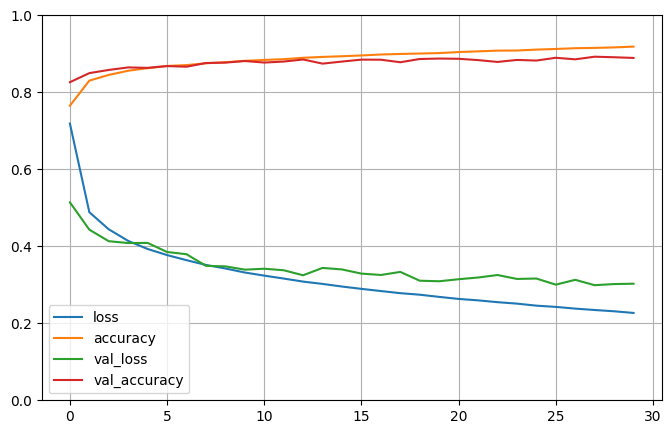

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()


In [16]:
model.evaluate(X_test, y_test)


313/313 [==============================] - 0s 1ms/step - loss: 0.3366 - accuracy: 0.8816


[0.33662623167037964, 0.881600022315979]

In [17]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)


1/1 [==============================] - 0s 87ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.06, 0.  , 0.01, 0.  , 0.93],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [19]:
import numpy as np
y_pred = model.predict(X_new)
y_class = np.argmax(y_pred, axis=1)
y_class


1/1 [==============================] - 0s 23ms/step


array([9, 2, 1], dtype=int64)

In [20]:
import numpy as np
np.array(class_names)[y_class]


array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [21]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)